Задание 1. Базово изучите датасет.
Выдвиньте пару гипотез. Постарайтесь подтвердить или опровергнуть их визуально и с помощью расчётов.
Составьте корреляционную матрицу всех числовых признаков набора данных и визуализируйте её с помощью тепловой карты.

Задание 2.
В этом задании нужно окончательно ответить на вопрос:
Есть ли связь между среднемесячной температурой и потреблением газа в Южной Корее?

**Задание 1. Работа с датасетом "happines_corruption"**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
happy = pd.read_csv('happines_corruption.csv')
happy.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


In [ ]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


По общей информации видно, что в датафрейме нет пропусков, все типы данных соответствуют содержимому в ячейках

In [ ]:
happy.describe()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,5.473310,0.929217,0.504998,0.648691,0.427016,0.212440,0.125720,1.379277,2017.500000,0.609302,44.327020
std,1.124726,0.385774,0.552736,0.232261,0.148003,0.121660,0.109032,1.075276,1.708904,0.640754,19.508833
min,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,11.000000
25%,4.590750,0.644242,0.000000,0.510070,0.325433,0.125784,0.052862,0.000000,2016.000000,0.000000,30.000000
50%,5.485500,0.994544,0.000000,0.685397,0.439621,0.197000,0.089000,1.731948,2017.500000,0.176214,38.000000
75%,6.300500,1.228677,1.040410,0.815641,0.546280,0.273250,0.154250,2.236894,2019.000000,1.268250,57.000000
max,7.808700,2.096000,1.610574,1.141000,0.724000,0.838075,0.551910,3.602140,2020.000000,1.644000,91.000000


***1. Верно ли, что выше оценен уровень свободы, тем выше уровень счастья в стране?***

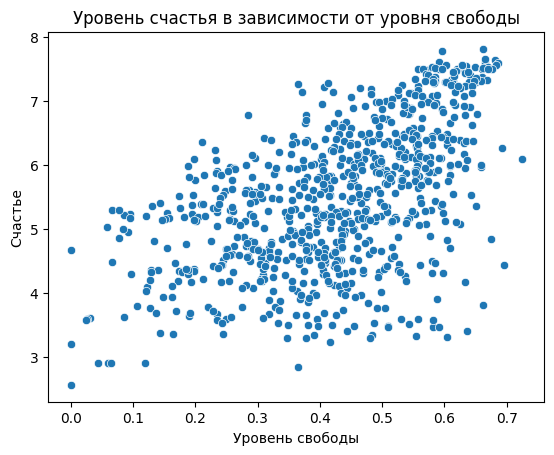

In [ ]:
sns.scatterplot(data=happy, x="freedom", y="happiness_score");
plt.title("Уровень счастья в зависимости от уровня свободы")
plt.ylabel("Счастье")
plt.xlabel("Уровень свободы")
plt.show()

Прослеживается линейная зависимость,так как по траектории прямой у центра плотность точек больше

***2. Отличается ли уровень счастья от расположения страны?***

In [ ]:
happy.groupby(['continent'])['happiness_score'].median().sort_values()

continent
Africa           4.3680
Asia             5.2395
South America    6.0055
Europe           6.0459
North America    7.0485
Australia        7.2928
Name: happiness_score, dtype: float64

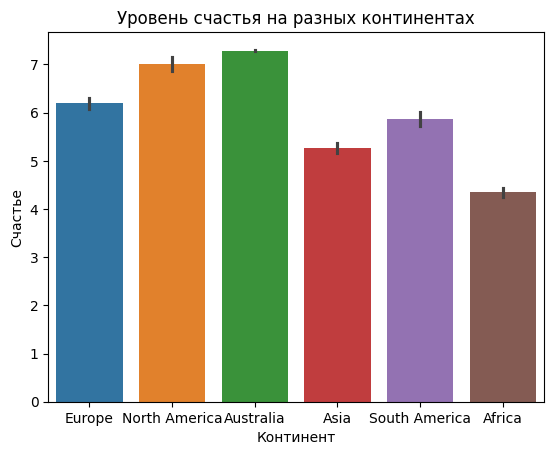

In [ ]:
sns.barplot(data=happy, x="continent", y="happiness_score", hue = "continent")
plt.title("Уровень счастья на разных континентах")
plt.ylabel("Счастье")
plt.xlabel("Континент")
plt.show()

Из графика и группировки видно, что наименьший медианный показатель счастья в Африке (4.368), а максимальный в Австралии (7.2928). Уровень счастья практически равен в Европе и Северной Америке.

***3. Распределяются ли данные нормально по уровню здоровья и уровню семьи?***

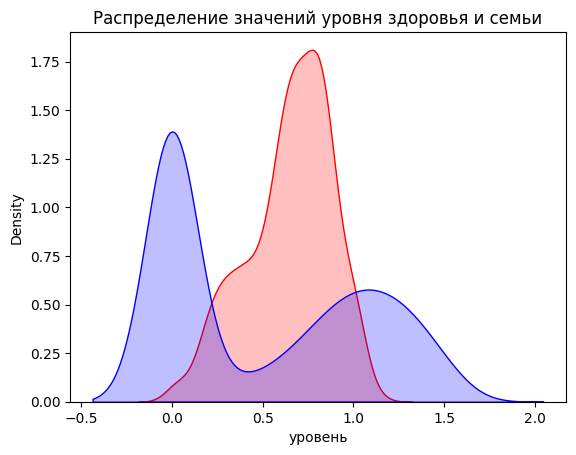

In [ ]:
fig = sns.kdeplot(happy['health'], fill=True, color="r")
fig = sns.kdeplot(happy['family'], fill=True, color="b")
plt.title("Распределение значений уровня здоровья и семьи")
plt.xlabel("уровень")
plt.show()

Видно, что данные распределены нормально, при этом у уровня показателя "семья" имеется 2 моды, а у здоровья - одна.

**4. Как менялся уровень счастья по годам в Европе?**

In [ ]:
happ_eu = happy[happy['continent'] == 'Europe']
happy.groupby('Year')['happiness_score'].median().sort_values(ascending=False)

Year
2020    5.5816
2017    5.5240
2018    5.4830
2019    5.3950
2016    5.3460
2015    5.3300
Name: happiness_score, dtype: float64

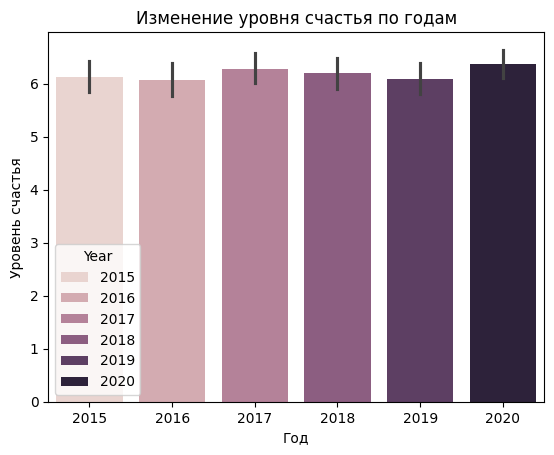

In [ ]:
sns.barplot(data=happ_eu, x="Year", y="happiness_score", hue = "Year")
plt.title("Изменение уровня счастья по годам")
plt.ylabel("Уровень счастья")
plt.xlabel("Год")
plt.show()

По годам видно, что уровень счастья в 2020 году имеет максимальное значение, в сравнении с другими годами

**Корреляционная матрица**

In [ ]:
hap_corr = happy.drop(['Country', 'continent', 'Year', 'cpi_score'], axis= 1)
hap_corr.corr()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,social_support
happiness_score,1.000000,0.793267,0.154946,0.753534,0.544284,0.155419,0.455477,0.174161,0.192633
gdp_per_capita,0.793267,1.000000,0.218191,0.774980,0.340260,-0.018355,0.359068,0.042710,0.111701
family,0.154946,0.218191,1.000000,-0.054683,0.013833,0.245437,0.114767,0.600243,-0.869885
health,0.753534,0.774980,-0.054683,1.000000,0.381869,-0.028882,0.312741,-0.073157,0.347438
freedom,0.544284,0.340260,0.013833,0.381869,1.000000,0.306240,0.473980,-0.015270,0.208709
generosity,0.155419,-0.018355,0.245437,-0.028882,0.306240,1.000000,0.280039,0.147750,-0.215131
government_trust,0.455477,0.359068,0.114767,0.312741,0.473980,0.280039,1.000000,0.098366,-0.008136
dystopia_residual,0.174161,0.042710,0.600243,-0.073157,-0.015270,0.147750,0.098366,1.000000,-0.654570
social_support,0.192633,0.111701,-0.869885,0.347438,0.208709,-0.215131,-0.008136,-0.654570,1.000000


<Axes: >

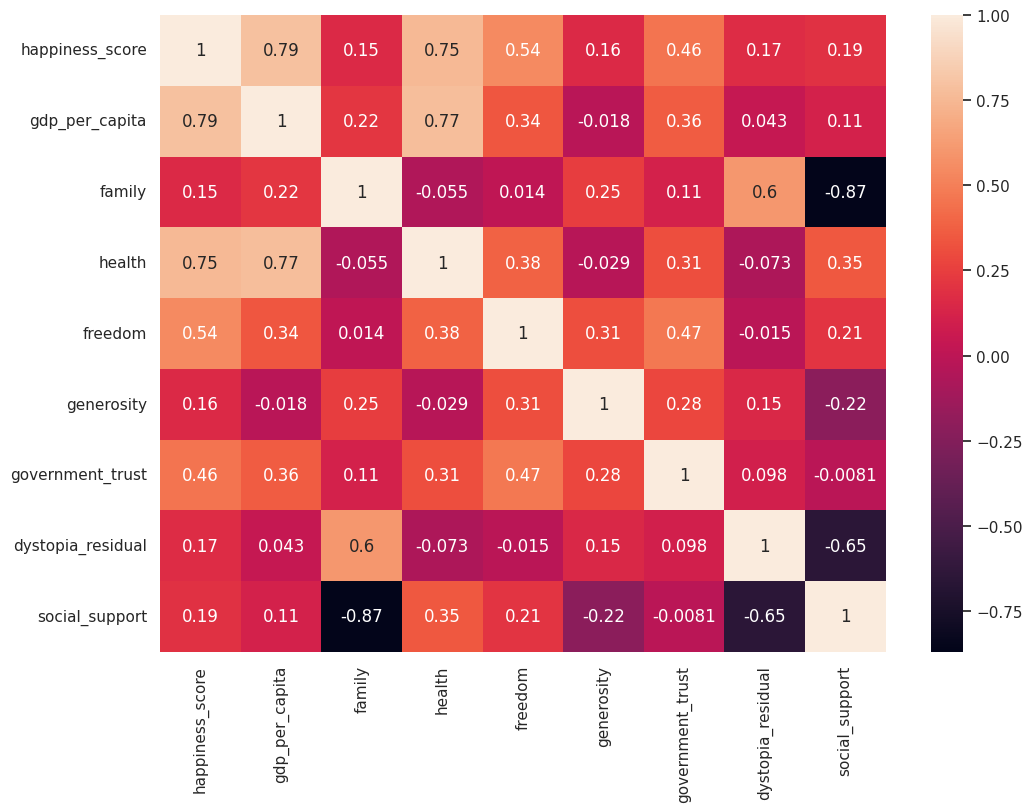

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(hap_corr.corr(), annot=True)

Получаем, что не все показатели коррелируют друг с другом. Уровень счастья больше всего коррелирует с gdp_per_capita (так же это самое сильное значение положительной кореляции), а меньше всего с уровнем показателя family. Наибольшая отрицательная корреляция у уровня показателя family и social_support   

**Задание 2. Линейная регрессия**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
gas = pd.read_csv('gas_sales_data.csv')

In [ ]:
sum_gas = gas[['Temperature', 'Sum']]
sum_gas.head()

,Temperature,Sum
0,-1.20,1717175
1,-0.99,1766341
2,6.64,1490537
3,12.11,1096964
4,17.59,790248


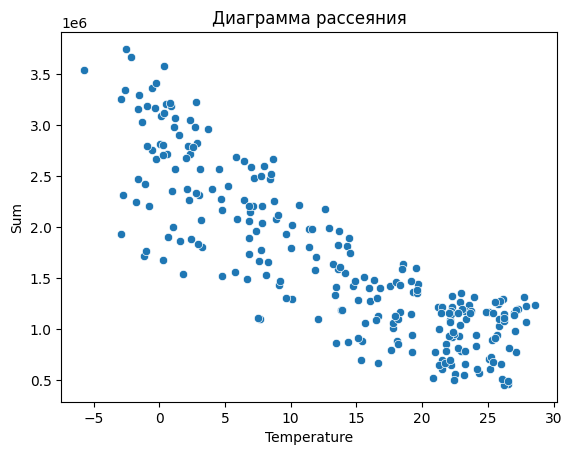

In [ ]:
sns.scatterplot(data=sum_gas, x="Temperature", y="Sum");
plt.title("Диаграмма рассеяния")
plt.ylabel("Sum")
plt.xlabel("Temperature")
plt.show()

Прослеживается отрицательная линейная зависимость: чем меньше температура, тем больше потребление газа

In [ ]:
X = sum_gas[['Temperature']]
y = sum_gas['Sum']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train.shape

(176, 1)

In [ ]:
y_train.shape

(176,)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Полученное линейное уравнение: y = -69183.684x + 2571665.571


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1441204.17465859,  736914.27195059, 1659132.7791311 ,
       1246106.18589271,  805406.11907052, 1632842.97922648,
        641440.78808644,  691944.87737689, 1508312.34809933,
        832387.75581473, 2683051.30173212, 1971151.19378857,
       1969075.68326979, 1834167.49954871, 1041322.48137251,
       1211514.34391295, 1213589.85443174, 1615547.0582366 ,
       1100820.4495777 , 2499714.53923937, 2099141.0091137 ,
        736222.43511099, 1431518.45890425, 1358875.59074675,
       1643912.36866   , 1983604.25690129,  816475.50850404,
       1625232.77399093, 2042410.38826689,  765279.58237399,
       1041322.48137251, 2609024.75989543,  956918.38694189,
       1934483.84129002, 1425291.92734789, 2344743.08717003,
       2294930.83471917,  769430.60341156, 2487953.31296625,
       2073543.04604868,  817167.34534364, 2968779.91648497,
       2721102.32790986, 2551602.30220902, 1580263.37941724,
       1906810.36770621, 1243338.83853433,  824777.55057919,
       1785738.92077704,

In [ ]:
y_test

165    1480101
6       464203
111    1634442
172    1474082
115     907624
        ...   
119    2703917
75     1583588
113     949311
118    1776507
120    3256385
Name: Sum, Length: 76, dtype: int64

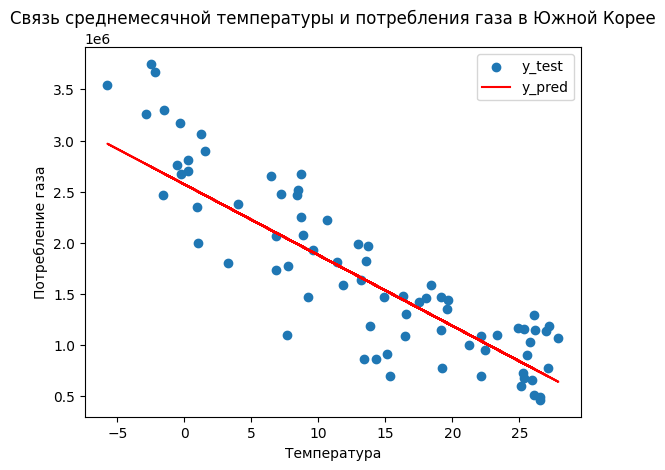

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.title("Связь среднемесячной температуры и потребления газа в Южной Корее")
plt.ylabel("Потребление газа")
plt.xlabel("Температура")
plt.legend(['y_test', 'y_pred'])
plt.show()

In [ ]:
print(f'Полученное линейное уравнение: y = {round(model.coef_[0],3)}x + {round(model.intercept_,3)}')
print(f'Коэффициент детерминации R2 = {model.score(X_test, y_test)}')

Полученное линейное уравнение: y = -69183.684x + 2571665.571
Коэффициент детерминации R2 = 0.769403571876491


Получили довольно высокую точность модели для линейной регрессии.

На поставленный вопрос можно ответить, что между среднемесячной температурой и потреблением газа есть отрицательная линейная зависимость: чем выше потребление газа, тем ниже температура

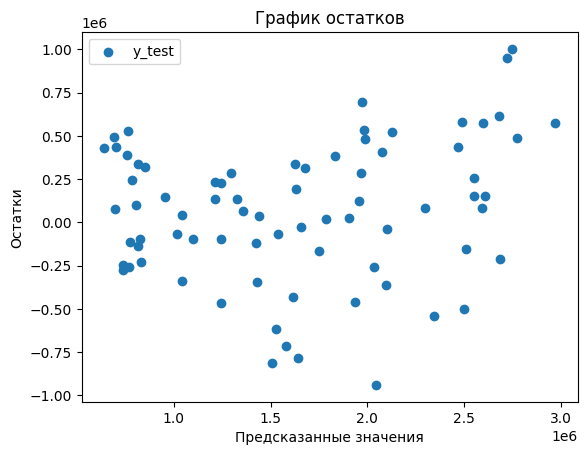

In [ ]:
ost = y_test - y_pred
plt.scatter(x=y_pred, y=ost)
plt.title("График остатков")
plt.ylabel("Остатки")
plt.xlabel("Предсказанные значения")
plt.legend(['y_test', 'y_pred'])
plt.show()